<a href="https://colab.research.google.com/github/shivam-sunita-puri/TIYA/blob/main/Fitbit_histogram_for_a_time_range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.interpolate import interp1d




In [ ]:
# Substitute YYY below with token received
access_token='YYY'

headers = {'Authorization': f'Bearer {access_token}'}

#url = "https://api.fitbit.com/1/user/-/activities/heart/date/today/1d/1sec.json"  # Replace date as needed

url = "https://api.fitbit.com/1/user/-/activities/heart/date/2024-11-04/2024-11-04/1sec/time/10:00/10:04.json"

#url = "https://api.fitbit.com/1/user/-/activities/heart/date/2024-11-04/2024-11-04/15min.json"


response = requests.get(url, headers=headers)
data = response.json()

pprint.pprint(data)

{'activities-heart': [{'customHeartRateZones': [],
                       'dateTime': '2024-11-04',
                       'heartRateZones': [{'caloriesOut': 3.34323,
                                           'max': 97,
                                           'min': 30,
                                           'minutes': 3,
                                           'name': 'Out of Range'},
                                          {'caloriesOut': 0,
                                           'max': 136,
                                           'min': 97,
                                           'minutes': 0,
                                           'name': 'Fat Burn'},
                                          {'caloriesOut': 0,
                                           'max': 165,
                                           'min': 136,
                                           'minutes': 0,
                                           'name': 'Cardio'},
                   

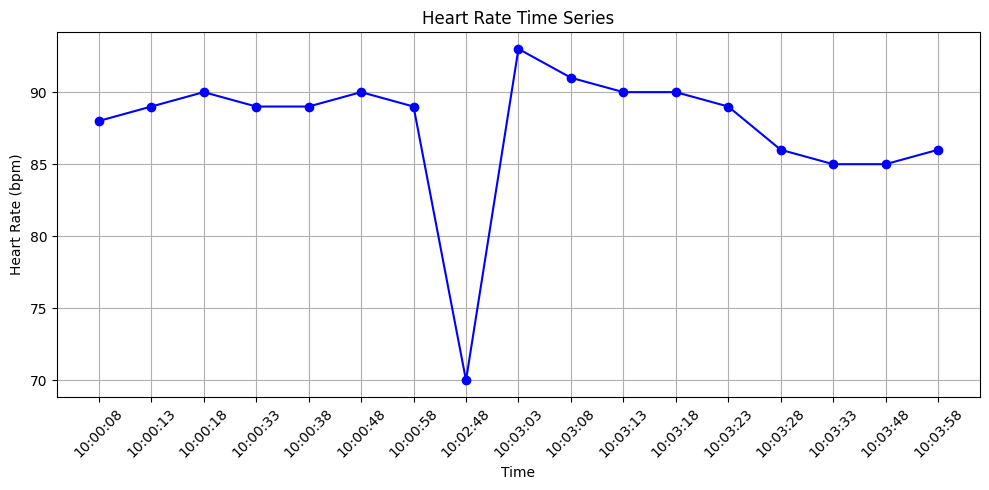

In [ ]:

# Convert the data into a DataFrame
df = pd.DataFrame(data['activities-heart-intraday']['dataset'])

# Set the datetime column as the index
df.set_index('time', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], marker='o', linestyle='-', color='b')
plt.title('Heart Rate Time Series')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust the layout to prevent clipping of ylabel
plt.show()

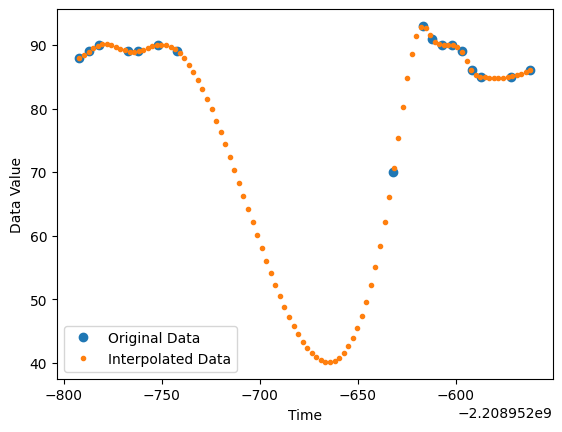

In [23]:
time_format = '%H:%M:%S'

# Sample data: Replace these with your actual time and data points
timestamp_points = np.array([datetime.strptime(time_string,time_format).timestamp() for time_string in df.index])  # Unequally spaced time points
data_points = np.array(df['value'])  # Corresponding data values

# Define equally spaced time points for interpolation
new_time_points = np.linspace(timestamp_points.min(), timestamp_points.max(), num=100)  # Change `num` to desired resolution

# Interpolate data
interpolator = interp1d(timestamp_points, data_points, kind='cubic')  # 'linear' or 'cubic' for smooth interpolation
new_data_points = interpolator(new_time_points)

# Plot for visualization
plt.plot(timestamp_points, data_points, 'o', label="Original Data")
plt.plot(new_time_points, new_data_points, '.', label="Interpolated Data")
plt.xlabel("Time")
plt.ylabel("Data Value")
plt.legend()
plt.show()

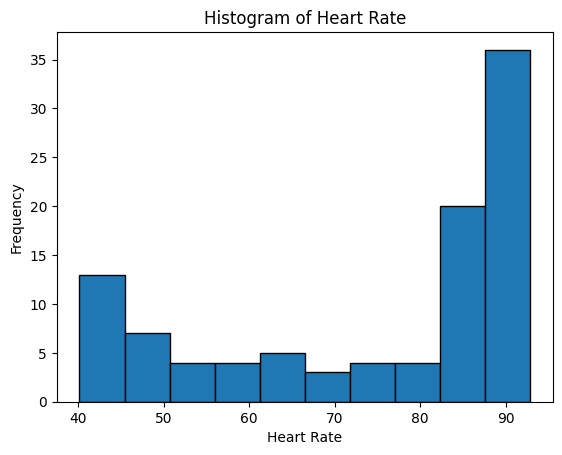

In [25]:
plt.hist(new_data_points, bins=10, edgecolor='black')  # 'bins' defines the number of bars in the histogram
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Heart Rate")
plt.show()

In [26]:
len(new_data_points)

100